In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [2]:
dt = pd.read_csv("data.csv")
hsg = pd.read_csv("housing.csv")
dmd = pd.read_csv("Diamond.csv")
toy = pd.read_csv("ToyotaCorolla.csv")

In [3]:
dt.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dt.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
max(dt['YearsExperience'])-min(dt['YearsExperience'])

9.4

In [6]:
max(dt['Salary'])-min(dt['Salary'])

84660.0

In [7]:
dt.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
dt.duplicated().sum()

0

In [9]:
len(dt[(dt['YearsExperience'] >= 5) & (dt['Salary'] >= 60000)])

14

In [10]:
len(dt[(dt['Salary'] >= 50000) & (dt['Salary'] <= 80000)])

12

<Axes: ylabel='Salary'>

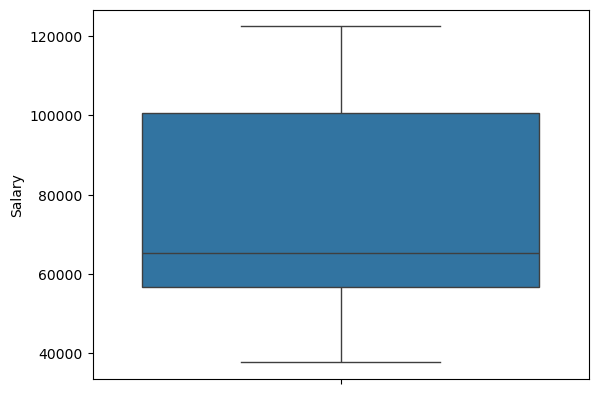

In [11]:

sns.boxplot(dt['Salary'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

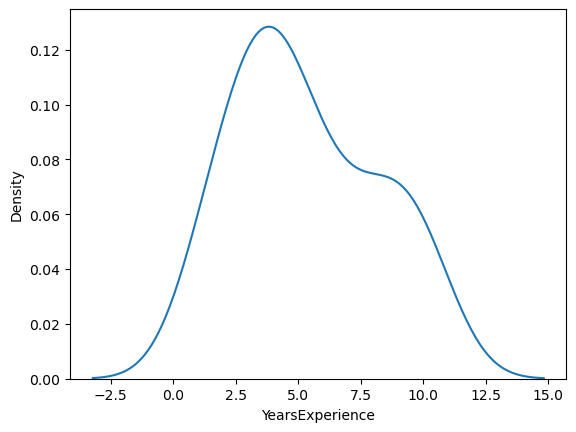

In [12]:
sns.kdeplot(dt['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

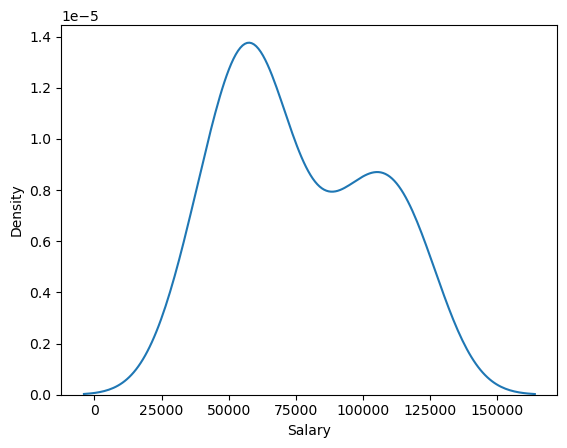

In [13]:
sns.kdeplot(dt['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

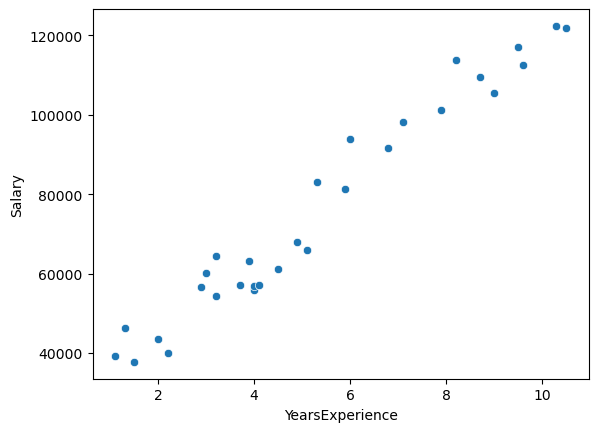

In [14]:
sns.scatterplot(data=dt, x="YearsExperience", y="Salary")

<Axes: xlabel='YearsExperience', ylabel='Salary'>

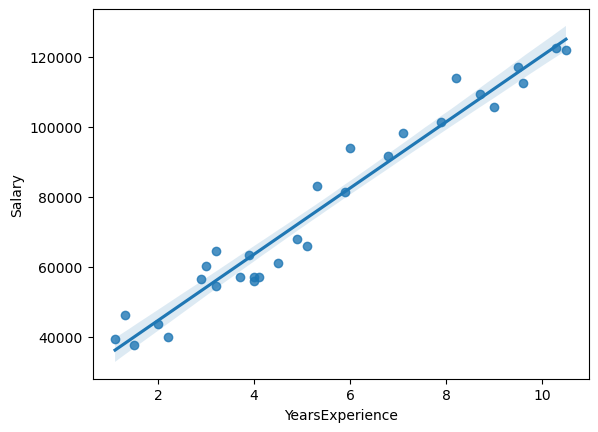

In [15]:
sns.regplot(x=dt['YearsExperience'], y=dt['Salary'])

In [16]:
dt_y = dt.iloc[:,-1:]
dt_y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [17]:
dt_x = dt.iloc[:,:-1]
dt_x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [18]:

dt_x_train, dt_x_test, dt_y_train, dt_y_test=train_test_split(dt_x,dt_y,test_size=0.2,random_state=0)

In [19]:
dt_lr = LinearRegression()
dt_lr

LinearRegression()

In [20]:
dt_lr.fit(dt_x_train, dt_y_train)

LinearRegression()

In [21]:
pred = dt_lr.predict(dt_x_test)
pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [22]:
score = r2_score(dt_y_test, pred)
score

0.988169515729126

In [23]:
dt_x_train, dt_x_test, dt_y_train, dt_y_test=train_test_split(dt_x,dt_y,test_size=0.4,random_state=0)

In [24]:
dt_lr2 = LinearRegression()
dt_lr2

LinearRegression()

In [25]:
dt_lr2.fit(dt_x_train, dt_y_train)

LinearRegression()

In [26]:
pred = dt_lr2.predict(dt_x_test)
pred

array([[ 40950.03066143],
       [123734.76796394],
       [ 65409.15759172],
       [ 63527.68628939],
       [116208.88275462],
       [108682.9975453 ],
       [117149.61840578],
       [ 64468.42194055],
       [ 76697.98540569],
       [101157.11233598],
       [ 54120.32977774],
       [ 74816.51410337]])

In [27]:
score = r2_score(dt_y_test, pred)
score

0.9679117063698979

In [28]:
hsg.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
hsg.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [30]:
col = hsg.columns
col

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
hsg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [32]:
hsg.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [33]:
hsg.duplicated().sum()

0

In [34]:
hsg['waterfront'].sum()

163

In [35]:
len(hsg[hsg['floors']==2])

8241

In [36]:
hsg[hsg['yr_built']<1960]['waterfront'].sum()

80

In [37]:
max((hsg[hsg['bedrooms']>4]).price      )

7700000

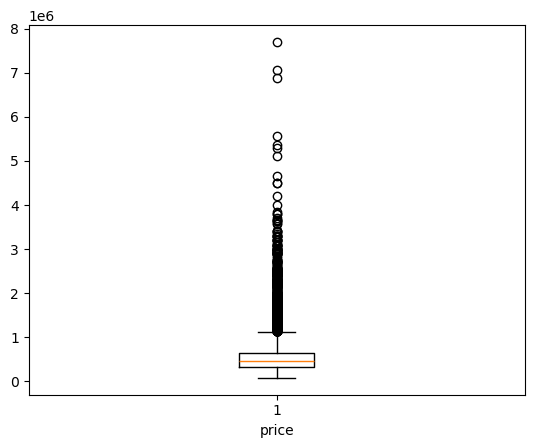

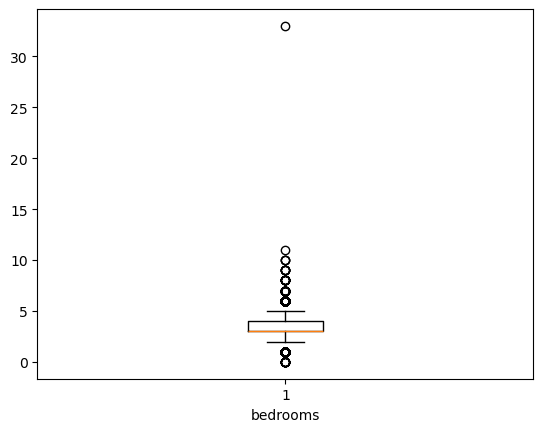

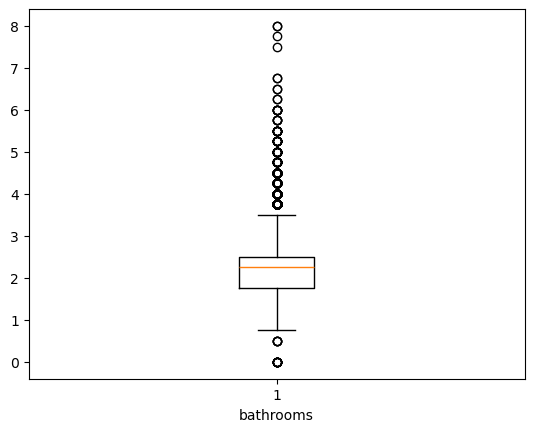

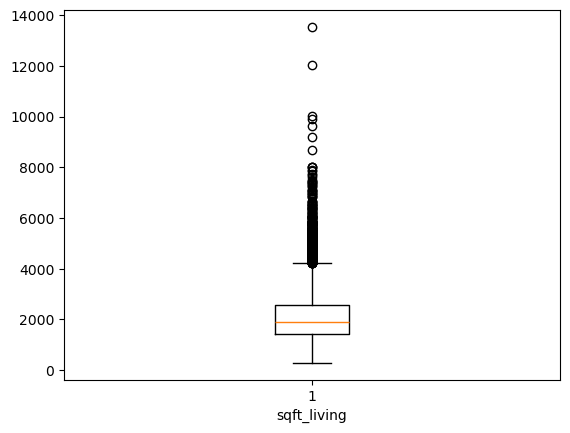

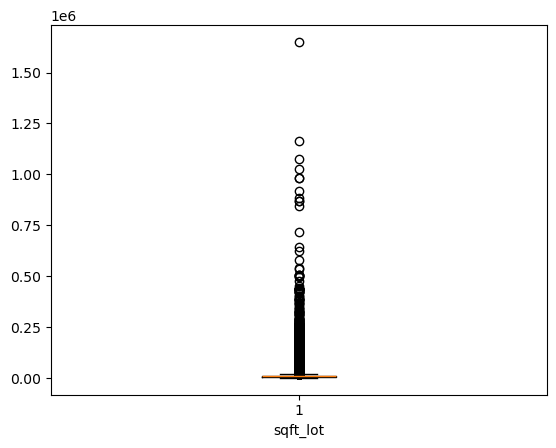

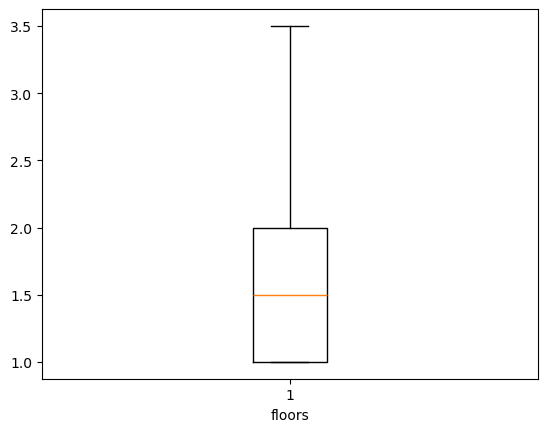

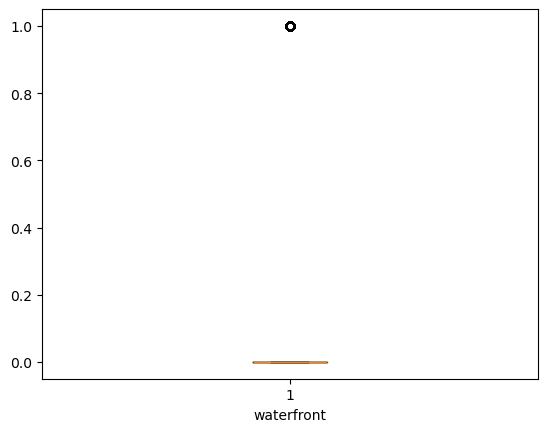

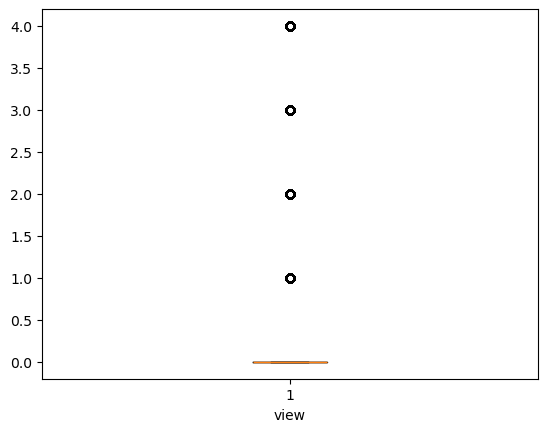

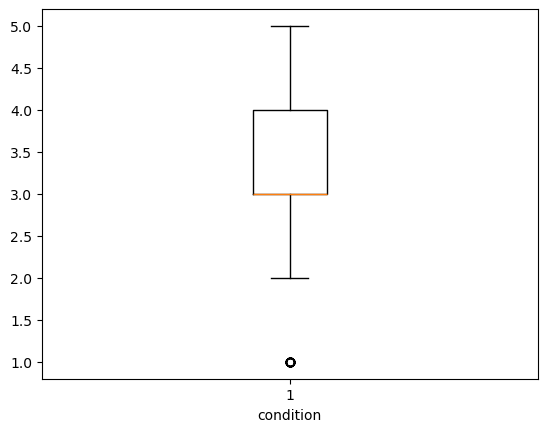

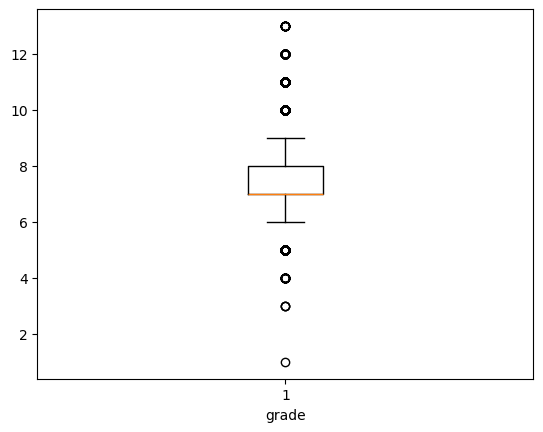

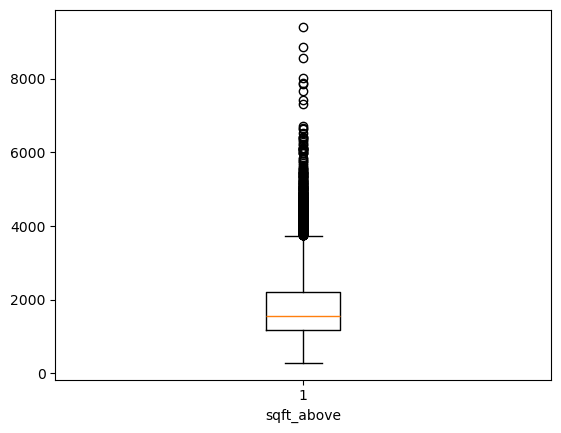

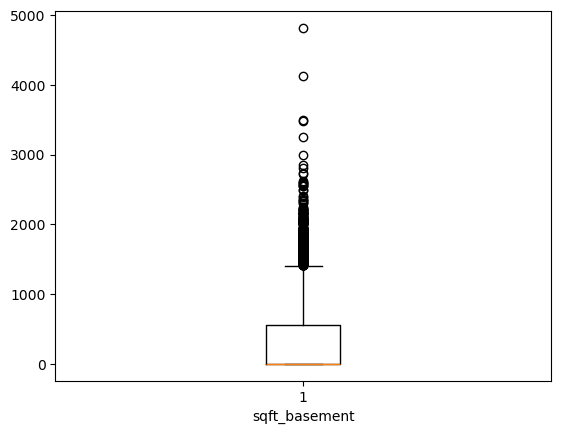

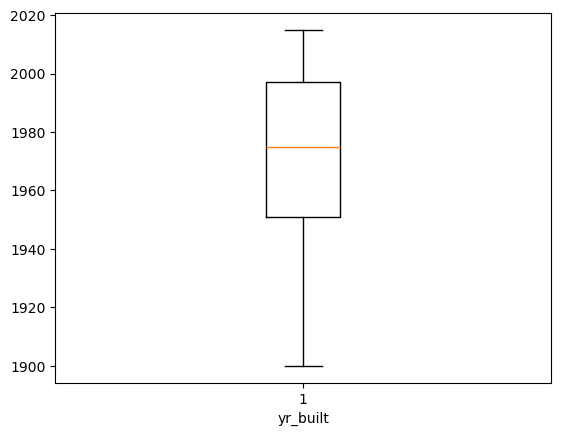

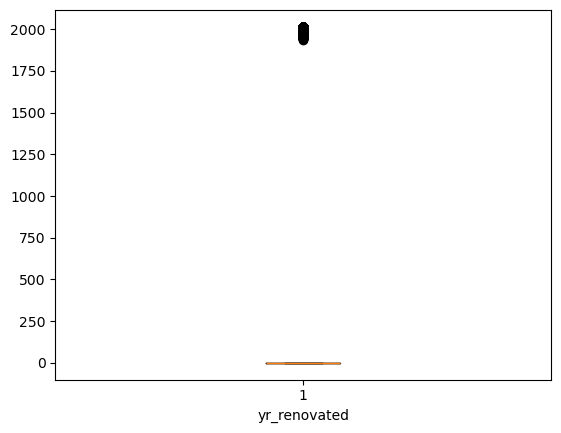

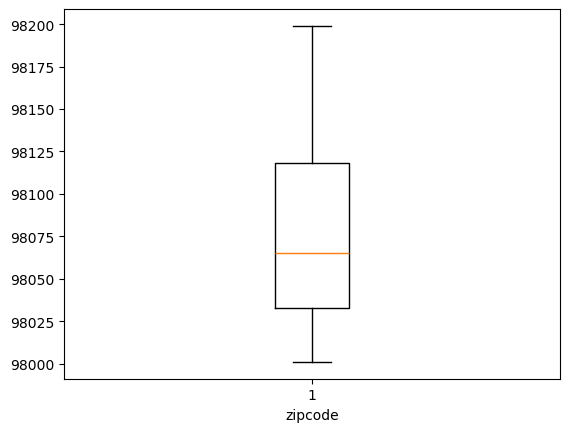

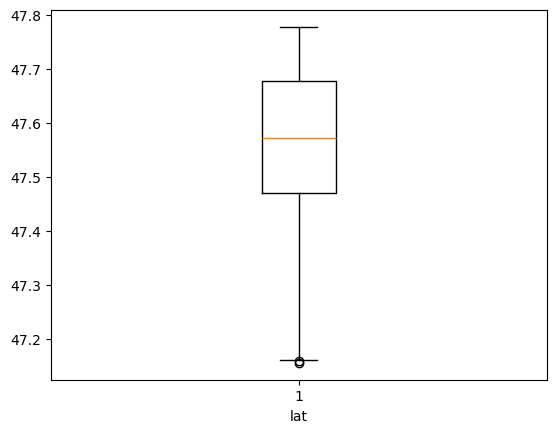

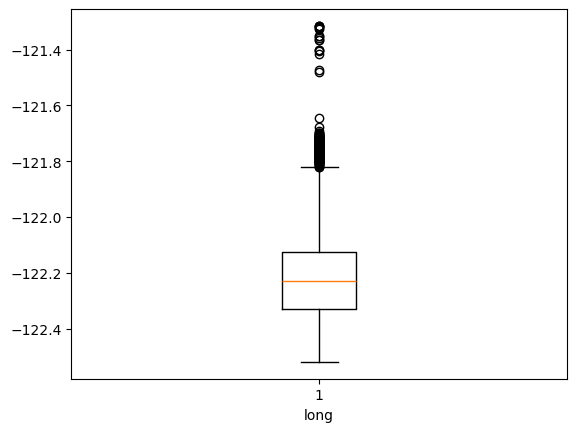

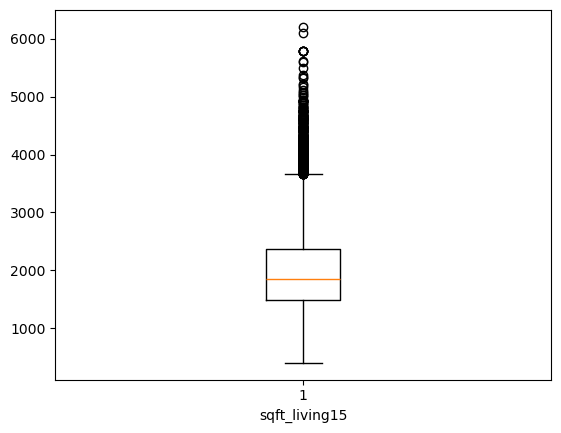

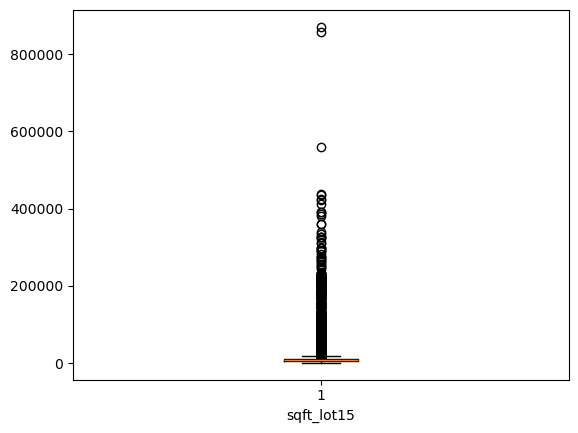

In [38]:
#Detecting Outliers

for itr in col[2:]:
    if(hsg[itr].dtypes == 'int64' or hsg[itr].dtypes == 'float64'):
        plt.boxplot(hsg[itr])
        plt.xlabel(itr)
        plt.show()

In [39]:
cor = hsg.corr(numeric_only=True)
cor

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


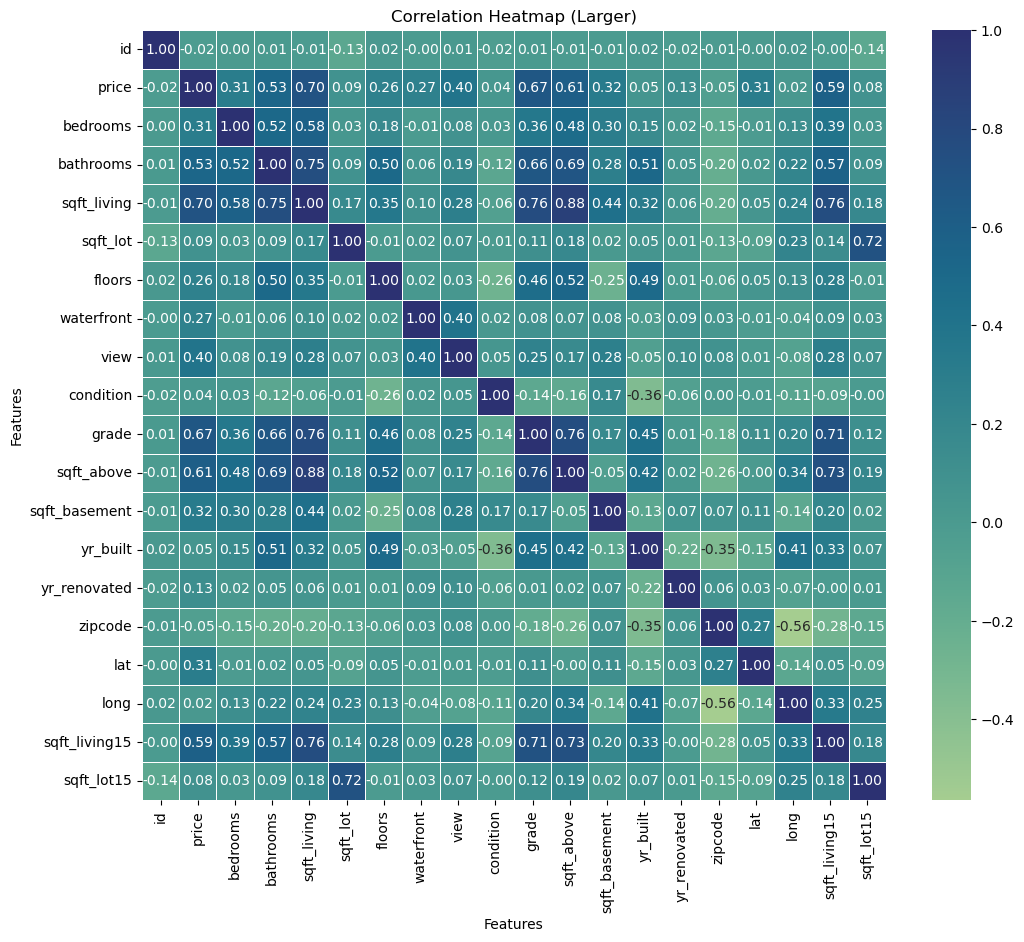

In [40]:


plt.figure(figsize=(12, 10))  
sns.heatmap(cor, annot=True, fmt=".2f", linewidth=0.5, cmap="crest")

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap (Larger)")

plt.show()


In [41]:
hsg_y =hsg.loc[:,['price']]
hsg_y.head()


,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [42]:
hsg_x = hsg.loc[:,['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
hsg_x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:

hsg_x_train, hsg_x_test, hsg_y_train, hsg_y_test=train_test_split(hsg_x,hsg_y,test_size=0.3,random_state=30)

In [44]:
hsg_lr = LinearRegression()
hsg_lr

LinearRegression()

In [45]:
hsg_lr.fit(hsg_x_train, hsg_y_train)

LinearRegression()

In [46]:
hsg_pred = hsg_lr.predict(hsg_x_test)
hsg_pred

array([[391442.91297697],
       [394039.34406939],
       [447426.28420985],
       ...,
       [278865.21213927],
       [407121.52774397],
       [610010.45590575]])

In [47]:
score = r2_score(hsg_y_test, hsg_pred)
score

0.7140379697729289

In [48]:
dmd.set_index('Unnamed: 0', inplace=True)
dmd.index.names = [None]
dmd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [49]:
cor = dmd.corr(numeric_only=True)
cor

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


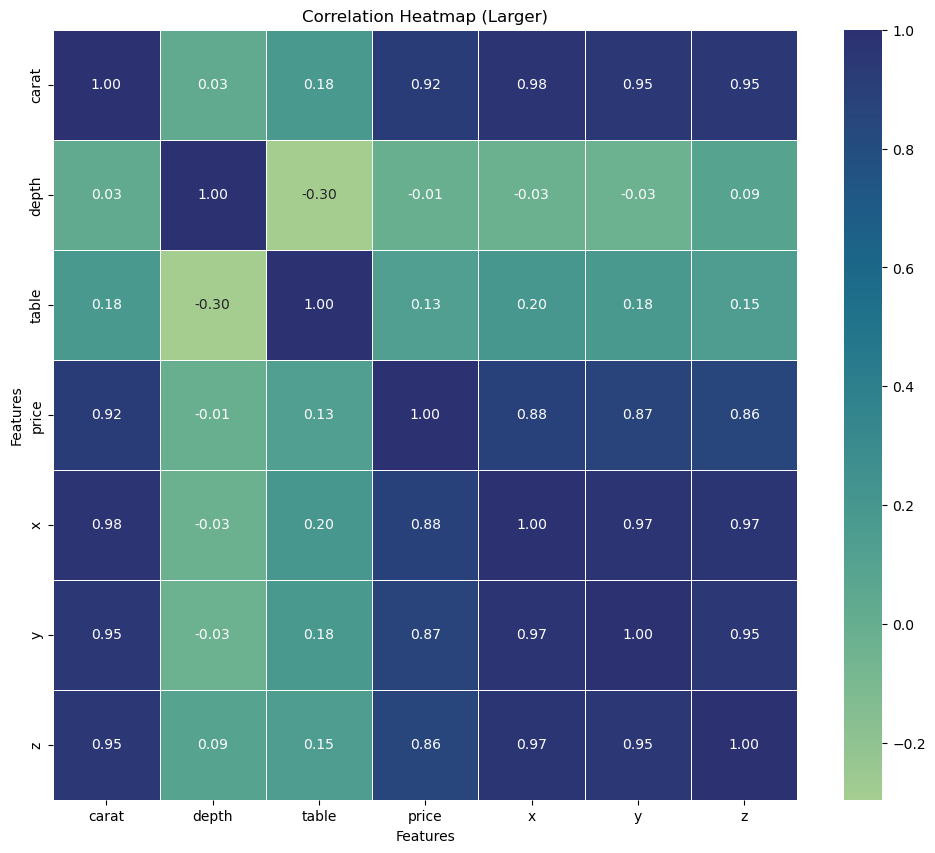

In [50]:
plt.figure(figsize=(12, 10))  
sns.heatmap(cor, annot=True, fmt=".2f", linewidth=0.5, cmap="crest")

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap (Larger)")

plt.show()

In [51]:
dmd.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [52]:
dmd['clarity'].nunique()

8

In [53]:
dmd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [54]:
dmd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [55]:
dmd['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [56]:
ans = dmd.groupby(['color'])


In [57]:
ans.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [58]:

price_by_color_clarity = dmd.groupby(['color', 'clarity'])['price'].mean()
highest_price_combination = price_by_color_clarity.idxmax()

highest_price_combination


('D', 'IF')

In [59]:
price_by_color = dmd.groupby(['color'])['price'].sum()
highest_price = price_by_color.idxmax()
highest_price

'G'

In [60]:
ans = dmd.iloc[:, -3:]
xyz = ans.isnull().sum()
xyz

x    0
y    0
z    0
dtype: int64

In [61]:
toy.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,3,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [62]:
toy.set_index('Unnamed: 0', inplace=True)
toy.index.names = [None]
toy.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,3,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [63]:
toy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 123.4+ KB


In [64]:
toy.isnull().sum()

Price          0
Age          100
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [65]:
toy.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1336.000000,1436.000000,1436.000000,1286.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68533.259749,101.502089,0.674961,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.589804,37506.448872,14.981080,0.468572,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,43.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,60.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [66]:
toy['FuelType'].unique()

array(['Diesel', nan, 'Petrol', 'CNG'], dtype=object)

In [67]:
toy.astype('object').describe()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1436,1336.0,1436,1336,1436,1286.0,1436,1436,1436,1436
unique,236,77.0,1263,3,12,2.0,2,12,4,59
top,8950,65.0,36000,Petrol,110,1.0,0,1600,5,1075
freq,109,62.0,9,1177,835,868.0,1356,846,674,192


In [68]:
toy.sort_values('Price')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
191,4350,44.0,158320,Diesel,69,0.0,0,1800,5,1110
1048,4400,74.0,203254,Diesel,72,1.0,0,2000,3,1135
393,4450,56.0,129155,Diesel,69,0.0,0,1800,5,1110
192,4750,44.0,131273,Diesel,69,1.0,0,1800,5,1110
402,5150,56.0,113997,Diesel,72,1.0,0,2000,5,1135
...,...,...,...,...,...,...,...,...,...,...
112,24950,8.0,13253,Diesel,116,1.0,0,2000,5,1320
115,24990,8.0,6000,Diesel,90,1.0,0,2000,5,1280
110,31000,4.0,4000,Diesel,116,1.0,0,2000,5,1480
111,31275,4.0,1500,Diesel,116,1.0,0,2000,5,1480


In [69]:
mean_price_by_door = toy.groupby('Doors')['Price'].mean().sort_values(ascending=False)

second_highest_door = mean_price_by_door.index[1]

print("Door type with the second highest mean price:", second_highest_door)


Door type with the second highest mean price: 3


In [70]:
toy.dropna(inplace=True)

In [71]:
toy.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [72]:
toy.duplicated().sum()

1

In [73]:
toy.drop_duplicates(inplace=True)

<Axes: xlabel='Age', ylabel='KM'>

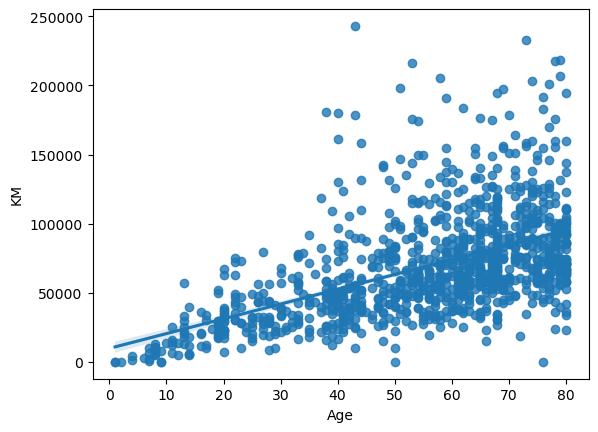

In [74]:
sns.regplot(x=toy['Age'], y=toy['KM'])

In [75]:
cor = toy.corr(numeric_only=True)
cor

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.877991,-0.600252,0.340334,0.114950,0.039827,0.104134,0.196475,0.539470
Age,-0.877991,1.000000,0.524385,-0.169841,-0.106936,0.030993,-0.087736,-0.170572,-0.448340
KM,-0.600252,0.524385,1.000000,-0.368792,-0.100931,-0.057024,0.323457,-0.079235,-0.032210
HP,0.340334,-0.169841,-0.368792,1.000000,0.055189,0.018551,0.039087,0.055133,0.091256
MetColor,0.114950,-0.106936,-0.100931,0.055189,1.000000,-0.006958,0.013699,0.097529,0.056604
Automatic,0.039827,0.030993,-0.057024,0.018551,-0.006958,1.000000,-0.058487,0.001398,0.065125
CC,0.104134,-0.087736,0.323457,0.039087,0.013699,-0.058487,1.000000,0.117318,0.626154
Doors,0.196475,-0.170572,-0.079235,0.055133,0.097529,0.001398,0.117318,1.000000,0.299534
Weight,0.539470,-0.448340,-0.032210,0.091256,0.056604,0.065125,0.626154,0.299534,1.000000


In [76]:
toy_dummies = pd.get_dummies(toy['FuelType'], drop_first=True)
toy = pd.concat([toy, toy_dummies], axis=1,)


In [77]:
toy.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Diesel,Petrol
0,13500,23.0,46986,Diesel,90,1.0,0,2000,3,1165,True,False
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165,True,False
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165,True,False
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170,True,False
5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170,True,False


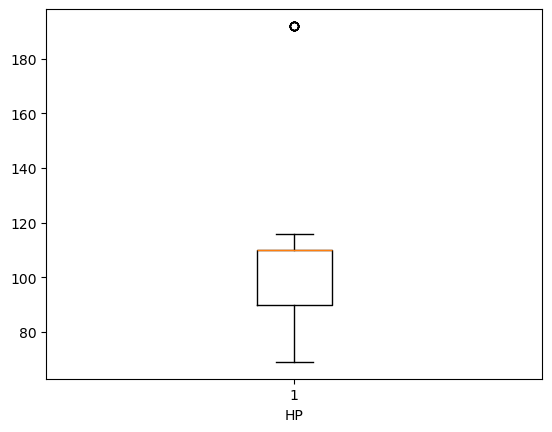

In [78]:
plt.boxplot(toy['HP'])
plt.xlabel('HP')
plt.show()

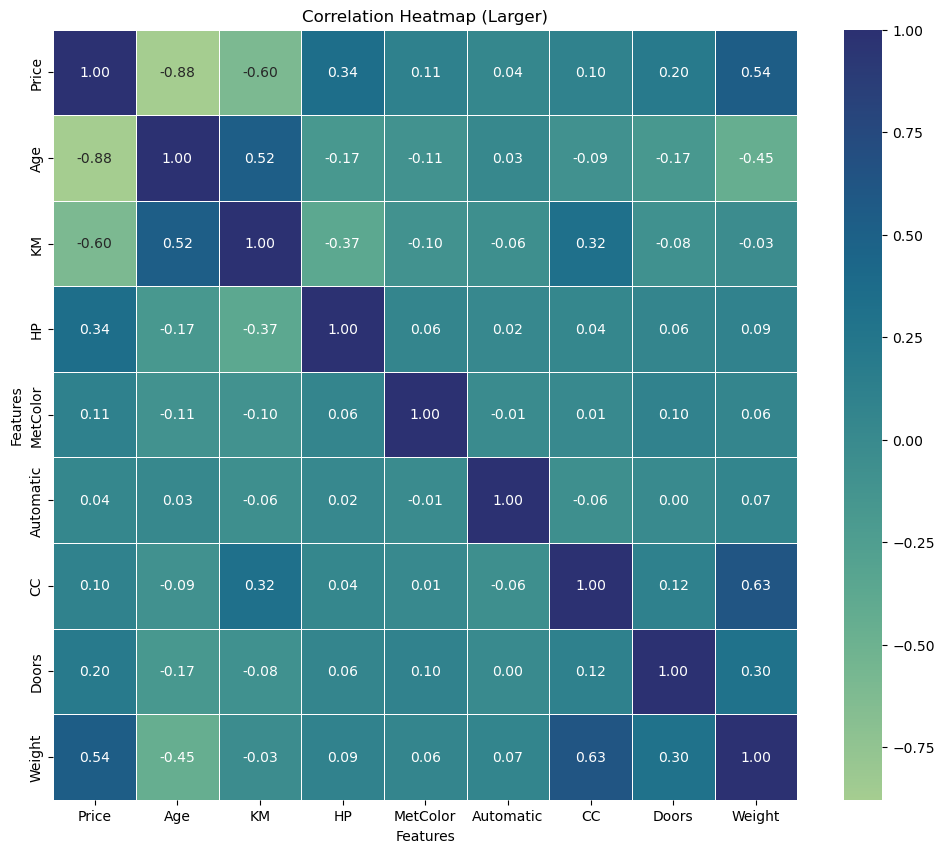

In [79]:
plt.figure(figsize=(12, 10))  
sns.heatmap(cor, annot=True, fmt=".2f", linewidth=0.5, cmap="crest")

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap (Larger)")

plt.show()

In [80]:
toy_y =toy.loc[:,['Price']]
toy_y.head()

,Price
0,13500
1,13750
3,14950
4,13750
5,12950


In [81]:
toy.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [82]:
toy_x = toy.loc[:,['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'Diesel', 'Petrol']]
toy_x.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Diesel,Petrol
0,23.0,46986,90,1.0,0,2000,3,1165,True,False
1,23.0,72937,90,1.0,0,2000,3,1165,True,False
3,26.0,48000,90,0.0,0,2000,3,1165,True,False
4,30.0,38500,90,0.0,0,2000,3,1170,True,False
5,32.0,61000,90,0.0,0,2000,3,1170,True,False


In [83]:
toy_x_train, toy_x_test, toy_y_train, toy_y_test=train_test_split(toy_x,toy_y,test_size=0.3,random_state=30)

In [84]:
toy_lr = LinearRegression()
toy_lr

LinearRegression()

In [85]:
toy_lr.fit(toy_x_train,toy_y_train)

LinearRegression()

In [86]:
toy_pred = toy_lr.predict(toy_x_test)
toy_pred

array([[ 8607.75213471],
       [12843.970658  ],
       [13442.42862831],
       [ 9028.7433064 ],
       [ 7727.86844676],
       [ 9202.97390864],
       [ 9344.55922087],
       [12888.85872373],
       [ 8600.11623774],
       [11864.60851239],
       [11504.78046964],
       [ 8969.88333444],
       [11337.43784132],
       [18584.21534216],
       [ 9386.0995408 ],
       [13348.76377432],
       [ 9705.72211638],
       [ 8005.82398802],
       [ 7424.89673451],
       [10843.91001323],
       [16400.65792095],
       [14019.93600407],
       [ 8422.61259732],
       [13595.53657857],
       [10362.81339891],
       [ 7470.83749385],
       [20333.98429882],
       [ 7950.33484744],
       [11114.54965095],
       [18069.13277906],
       [10529.72702356],
       [ 9402.16954114],
       [ 7556.83032317],
       [25457.35137539],
       [10579.01154814],
       [11317.311198  ],
       [ 8022.15094399],
       [17648.44695491],
       [ 6839.87363195],
       [ 7574.03199625],


In [87]:
score = r2_score(toy_y_test, toy_pred)
score

0.8907885722712735